# Generate Reactions

This script performs the same task as the script in `scripts/generateReactions.py` but in visual ipynb format.
It can also evaluate the reaction forward and reverse rates at a user selected temperature.

In [1]:
from rmgpy.rmg.main import RMG
from rmgpy.rmg.model import CoreEdgeReactionModel
from rmgpy import settings
from IPython.display import display
from rmgpy.cantherm.output import prettify
import os

Declare database variables here by changing the thermo and reaction libraries, or restrict to certain reaction families.  

In [2]:
database = """
database(
    thermoLibraries = ['KlippensteinH2O2','SulfurLibrary', 'primaryThermoLibrary','DFT_QCI_thermo','CBS_QB3_1dHR'],
    reactionLibraries = [],  
    seedMechanisms = [],
    kineticsDepositories = 'default', 
    kineticsFamilies = ['R_Addition_MultipleBond'],  # Select a few families
#   kineticsFamilies = 'all',   # Or select 'all' or 'default' for the families
    kineticsEstimator = 'rate rules',
)

options(
    verboseComments=True,  # Set to True for detailed kinetics comments
)
"""

List all species you want reactions between

In [3]:
speciesList = """
species(
    label = "benzene",
    structure = SMILES("c1ccccc1"))

species(
    label = "ethyl",
    structure = SMILES("C[CH2]"))
"""

In [4]:
# Write input file to disk
temp_path = 'temp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
input_path = os.path.join(temp_path, 'input.py')
inputFile = open(input_path,'w')
inputFile.write(database)
inputFile.write(speciesList)
inputFile.close()

In [5]:
# Execute generate reactions
from rmgpy.tools.generate_reactions import *
rmg = RMG(inputFile='temp/input.py', outputDirectory='temp')
rmg = execute(rmg)

Averaging thermo data over 6 value(s).
Averaging thermo data over 18 value(s).
Averaging thermo data over 5 value(s).
Averaging thermo data over 4 value(s).
Averaging thermo data over 14 value(s).
Averaging thermo data over 4 value(s).


In [25]:
from rmgpy.data.rmg import getDB
database = getDB('kinetics')
rules = database.families['R_Addition_MultipleBond'].rules
for label, entry in rules.entries.iteritems():
#     if 'benzene' in label:
#         print label
    for eachentry in entry:
        if 'training reaction 73' in eachentry.data.comment:
            print eachentry.label
            #print eachentry.data.comment
            

R_R;YJ
Cds-CdH_Cds-CdR_benzene;CsJ-HHH
Cds_Cds_benzene;CsJ-HHH
Cds_Cds;CsJ
Cd_R;CJ


In [7]:
# Pick some temperature to evaluate the forward and reverse kinetics
T = 500.0 # K

Reaction Family = R_Addition_MultipleBond

Reactants
Label: C=C
SMILES: C=C

Label: [H]
SMILES: [H]

Products
Label: ethyl
SMILES: C[CH2]

! Template reaction: R_Addition_MultipleBond
! Flux pairs: C2H4(3), ethyl(2); H(4), ethyl(2); 
! Exact match found for rate rule (Cds-HH_Cds-HH;HJ)
! Multiplied by reaction path degeneracy 2
C2H4(3)+H(4)=ethyl(2)                               4.620e+08 1.640     1.010    


Heat of Reaction = -36.48 kcal/mol
Forward kinetics at 500.0 K: 4.46E+06
Reverse kinetics at 500.0 K: 1.02E-03


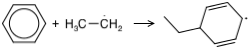

Reaction Family = R_Addition_MultipleBond

Reactants
Label: benzene
SMILES: c1ccccc1

Label: ethyl
SMILES: C[CH2]

Products
Label: CCC1[CH]C=CC=C1
SMILES: CCC1C=C[CH]C=C1

! Template reaction: R_Addition_MultipleBond
! Flux pairs: benzene(1), C8H11(5); ethyl(2), C8H11(5); 
! Average of (Cds-CdH_Cds-CdR_benzene;CsJ-HHH from training reaction 73 + Average of (Cds-HH_Cds-HH;CsJ-HHH + Cds-HH_Cds-CsH;CsJ-HHH + Cds-HH_Cds-CsCs
! ;CsJ-HHH + Cds-HH_Cds-OsH;CsJ-HHH + Average of (Average of (Cds-HH_Cds-CtH;CsJ-HHH + Cds-HH_Cds-CbH;CsJ-HHH + Cds-HH_Cds-CdH;CsJ-HHH) + Average of
! (Cds-HH_Cds-CtCs;CsJ-HHH + Cds-HH_Cds-CbCs;CsJ-HHH + Cds-HH_Cds-CdCs;CsJ-HHH)) + Cds-HH_Cds-CdCd;CsJ-HHH from training reaction 15) + Average of (Cds-
! CsH_Cds-HH;CsJ-HHH + Cds-CsH_Cds-CsH;CsJ-HHH + Cds-CsH_Cds-CsCs;CsJ-HHH + Average of (Average of (Cds-CsH_Cds-CtH;CsJ-HHH + Cds-CsH_Cds-CbH;CsJ-HHH +
! Cds-CsH_Cds-CdH;CsJ-HHH from training reaction 55) + Average of (Cds-CsH_Cds-CtCs;CsJ-HHH + Cds-CsH_Cds-CbCs;CsJ-HHH + 

In [8]:
for rxn in rmg.reactionModel.outputReactionList:
    print '========================='
    display(rxn)
    print 'Reaction Family = {0}'.format(rxn.family)
    print ''
    print 'Reactants'
    for reactant in rxn.reactants:
        print 'Label: {0}'.format(reactant.label)
        print 'SMILES: {0}'.format(reactant.molecule[0].toSMILES())
        print ''
    print 'Products'
    for product in rxn.products:
        print 'Label: {0}'.format(product.label)
        print 'SMILES: {0}'.format(product.molecule[0].toSMILES())
    print ''
    print rxn.toChemkin()
    print ''
    print 'Heat of Reaction = {0:.2F} kcal/mol'.format(rxn.getEnthalpyOfReaction(623.0)/4184)
    print 'Forward kinetics at {0} K: {1:.2E}'.format(T, rxn.getRateCoefficient(T))

    reverseRate = rxn.generateReverseRateCoefficient()
    print 'Reverse kinetics at {0} K: {1:.2E}'.format(T, reverseRate.getRateCoefficient(T))